In [6]:
# Simple Linear Regression

# Importing the libraries
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.io as sio
import h5py
import numpy as np





In [7]:
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('D:\\lexical processing op\\lexip\\func\\icentering_meanuswausub-01_func_sub-01_task-VisSpell_run-01_bold.mat')
print(type(mat))

# Print the keys of the MATLAB dictionary

<class 'dict'>


In [8]:
print(mat.keys())


dict_keys(['__header__', '__version__', '__globals__', 'R'])


In [9]:
print(type(mat['R']))

<class 'numpy.ndarray'>


In [10]:
print(mat['R'].shape)

(4, 4)


In [11]:
df = pd.DataFrame(np.hstack((mat['R'], )))

In [12]:
df.head()

,0,1,2,3
0,1.0,0.0,-0.0,1.0
1,0.0,1.0,0.0,-19.0
2,0.0,0.0,1.0,17.0
3,0.0,0.0,0.0,1.0


In [13]:
df.to_csv("C:\\Users\\HP\\Desktop\\dataframe.csv",index=False)

In [14]:
#impliment ML algorithm support vector machines

In [15]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\HP\\Desktop\\icentric region\\dataframe_icentric.csv')

In [17]:

y = dataset.iloc[:, -1].values
X = dataset.iloc[:, :2].values

In [18]:
# Splitting the dataset into the Training set and Test set
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)

In [19]:
X, y = make_circles(n_samples=1000, noise=.05, factor=.5)



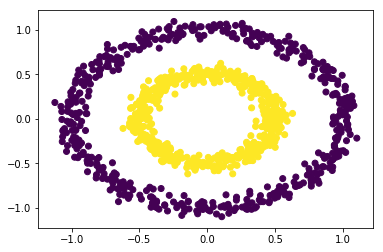

In [20]:
plt.scatter(X[:,0],X[:,1],c=y,)

In [21]:
#doing transform manually

In [22]:
col = np.sum(np.square(X),axis=1)

In [23]:
Z  = np.hstack([X,col.reshape(-1,1)])

In [24]:
from mpl_toolkits.mplot3d import Axes3D

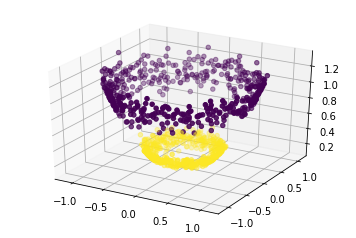

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

In [125]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [126]:
# Feature Scaling(Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [127]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [128]:
# Predicting the results on Test set
y_pred = classifier.predict(X_test)



In [129]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[115   0]
 [  0 135]]


In [130]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
#Define Variables
clf = classifier
h = 0.1
X_plot, z_plot = X_train, y_train 

In [131]:
#Template for all Regression
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))




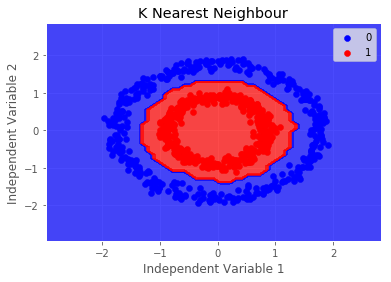

In [132]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))

for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('K Nearest Neighbour')
plt.xlabel('Independent Variable 1')
plt.ylabel('Independent Variable 2')
plt.legend()

plt.show()

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
preds = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, preds)*100
print(accuracy)

100.0


In [135]:
acc_list = []
# testing knn classifier with 20 k values
for i in range(1, 21):
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    
    knn_clf.fit(X_train, y_train)
    
    preds = knn_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, preds)
    
    acc_list.append(accuracy)

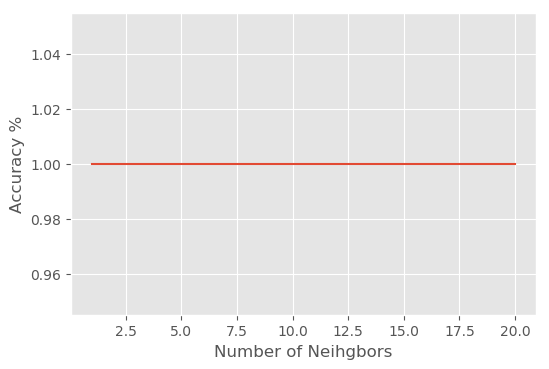

In [136]:
num_k = np.arange(1, 21)
plt.figure(dpi=100)
plt.style.use('ggplot')
plt.plot(num_k, acc_list)
plt.xlabel('Number of Neihgbors')
plt.ylabel('Accuracy %')
plt.savefig('acc_plot.png')